In [12]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [13]:
df = pd.read_csv('carbon_emmition_cleaned.csv')

In [14]:
df.head()

,country,year,population,gdp,co2,co2_per_capita,co2_per_gdp
0,Afghanistan,1960,9035048.0,1.303325e+10,0.414,0.046,0.032
1,Afghanistan,1961,9214082.0,1.314629e+10,0.491,0.053,0.037
2,Afghanistan,1962,9404411.0,1.336763e+10,0.689,0.073,0.052
3,Afghanistan,1963,9604491.0,1.363030e+10,0.707,0.074,0.052
4,Afghanistan,1964,9814318.0,1.387050e+10,0.839,0.085,0.060


In [15]:
print(f"the name of the columns in the dataframe is {df.columns}")
print(f"The shape of the dataframe is {df.shape}")

the name of the columns in the dataframe is Index(['country', 'year', 'population', 'gdp', 'co2', 'co2_per_capita',
       'co2_per_gdp'],
      dtype='object')
The shape of the dataframe is (10139, 7)


In [ ]:
#here i forgeot to actually remove the nan gdp in my previous code so i will do it now
df

,country,year,population,gdp,co2,co2_per_capita,co2_per_gdp
0,Afghanistan,1960,9035048.0,1.303325e+10,0.414,0.046,0.032
1,Afghanistan,1961,9214082.0,1.314629e+10,0.491,0.053,0.037
2,Afghanistan,1962,9404411.0,1.336763e+10,0.689,0.073,0.052
3,Afghanistan,1963,9604491.0,1.363030e+10,0.707,0.074,0.052
4,Afghanistan,1964,9814318.0,1.387050e+10,0.839,0.085,0.060
...,...,...,...,...,...,...,...
10134,Zimbabwe,2019,15271377.0,2.514642e+10,10.263,0.672,0.408
10135,Zimbabwe,2020,15526888.0,2.317871e+10,8.495,0.547,0.366
10136,Zimbabwe,2021,15797220.0,2.514009e+10,10.204,0.646,0.406
10137,Zimbabwe,2022,16069061.0,2.590159e+10,10.425,0.649,0.402


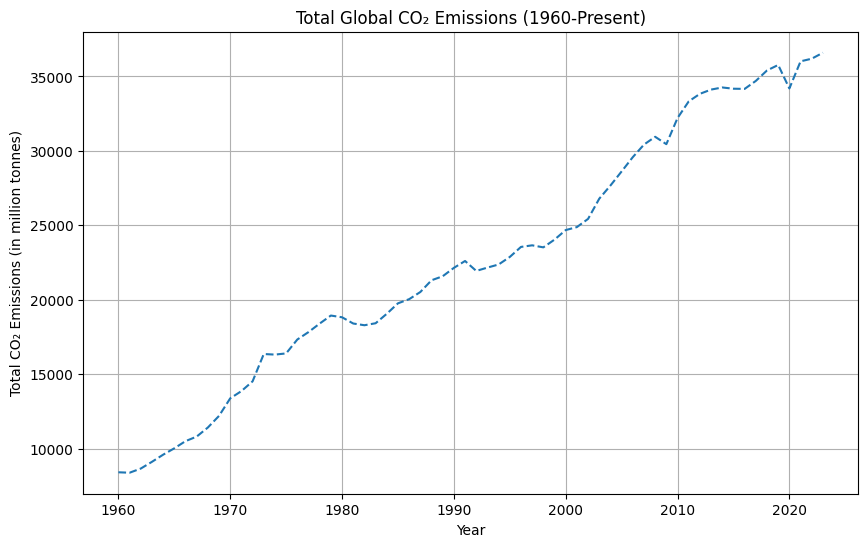

In [ ]:
#setting up the objective for the dataanalysis 
#first analyze the global trends 
global_emission_by_year = df.groupby('year')['co2'].sum()
#plloting the chart for this 

plt.figure(figsize = (10,6))
plt.plot(global_emission_by_year.index, global_emission_by_year.values, linestyle = '--')
plt.title('Total Global CO₂ Emissions (1960-Present)')
plt.xlabel('Year')
plt.ylabel('Total CO₂ Emissions (in million tonnes)')
plt.grid(True)
plt.show()

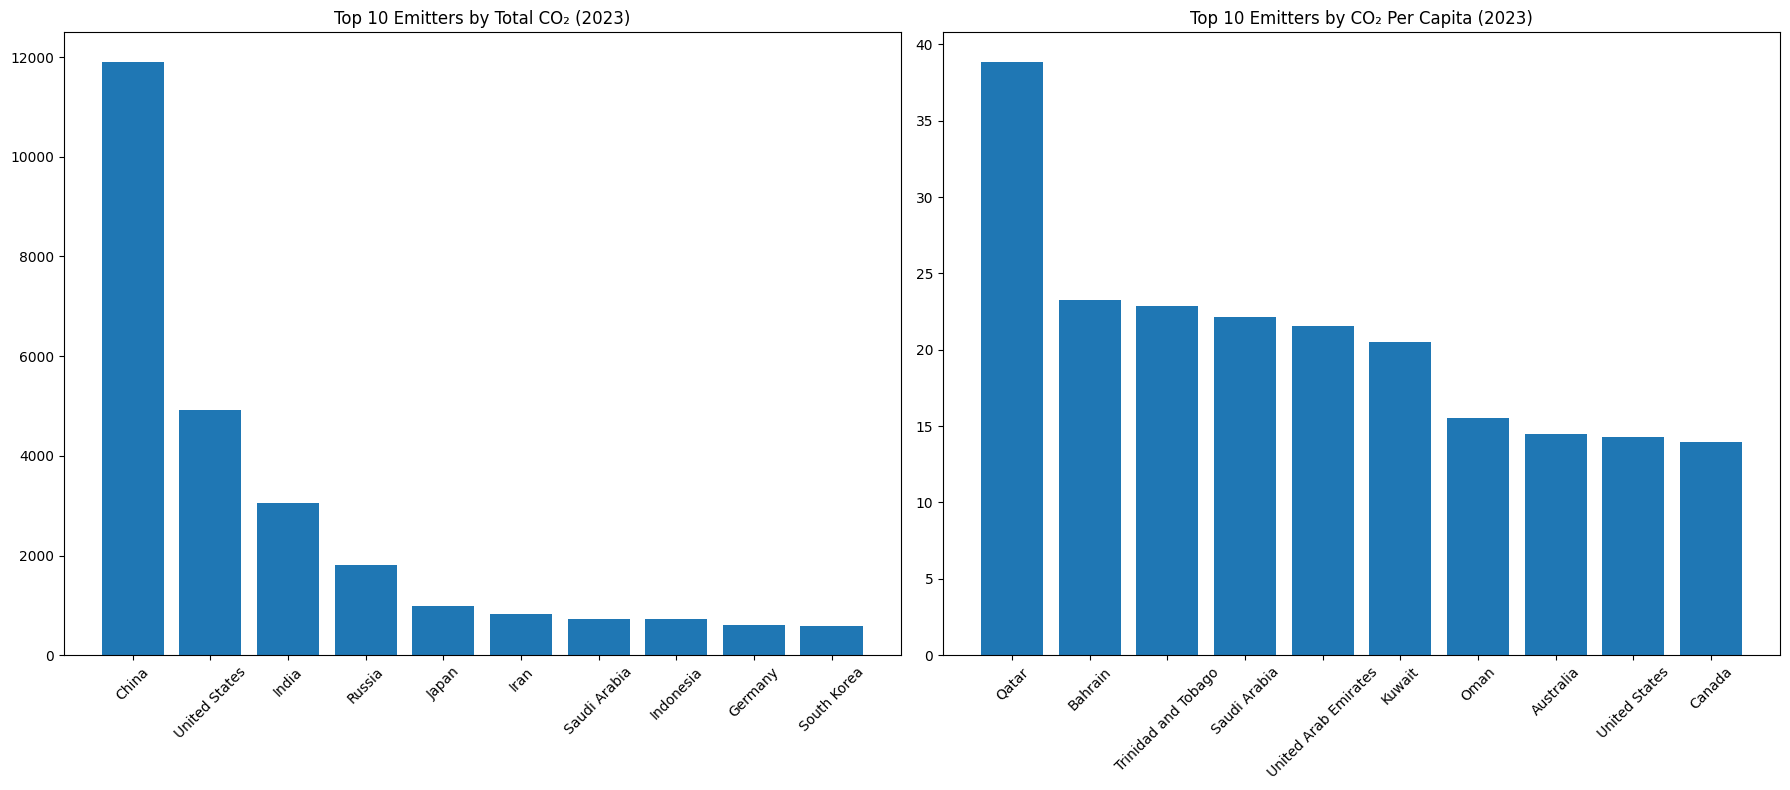

In [ ]:
# Identifying Key Players - Rankings & Comparisons

#find out which countries are the most significant emitters.

latest_year = df['year'].max()
df_latest = df[df['year'] == latest_year]

#finding the top 10 emitters BY CO2 
top_emitters_co2 = df_latest.sort_values(by='co2', ascending=False).head(10)

#per capita is human specific 
top_emitters_co2_per_capita  = df_latest.sort_values(by = 'co2_per_capita', ascending = False).head(10)

#creating the bar chart for this

fig ,(ax1, ax2) = plt.subplots(1,2, figsize = (18,8))
ax1.bar(top_emitters_co2['country'], top_emitters_co2['co2'])
ax1.set_title(f'Top 10 Emitters by Total CO₂ ({latest_year})')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(top_emitters_co2_per_capita['country'], top_emitters_co2_per_capita['co2_per_capita'])
ax2.set_title(f'Top 10 Emitters by CO₂ Per Capita ({latest_year})')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

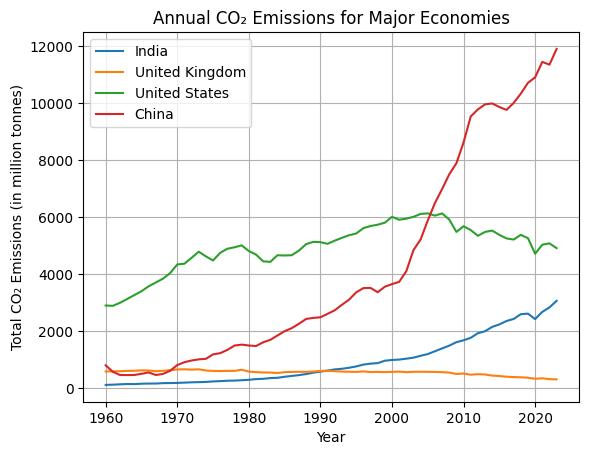

In [ ]:
#country deep dive comparitive trends 
#the emission trajectories of major economies like the USA China India, and the United Kingdom compare over time?
#so first we need to filter the data for these countries

countries = ['India','United Kingdom','United States','China']
df_com = df[df['country'].isin(countries)]

#now plotting the values

plt.Figure(figsize=(10,6))

for c in countries:
    country_data = df_com[df_com['country'] == c]
    plt.plot(country_data['year'],country_data['co2'], label= c)

plt.title('Annual CO₂ Emissions for Major Economies')
plt.xlabel('Year')
plt.ylabel('Total CO₂ Emissions (in million tonnes)')
plt.grid(True)
plt.legend()
plt.show()

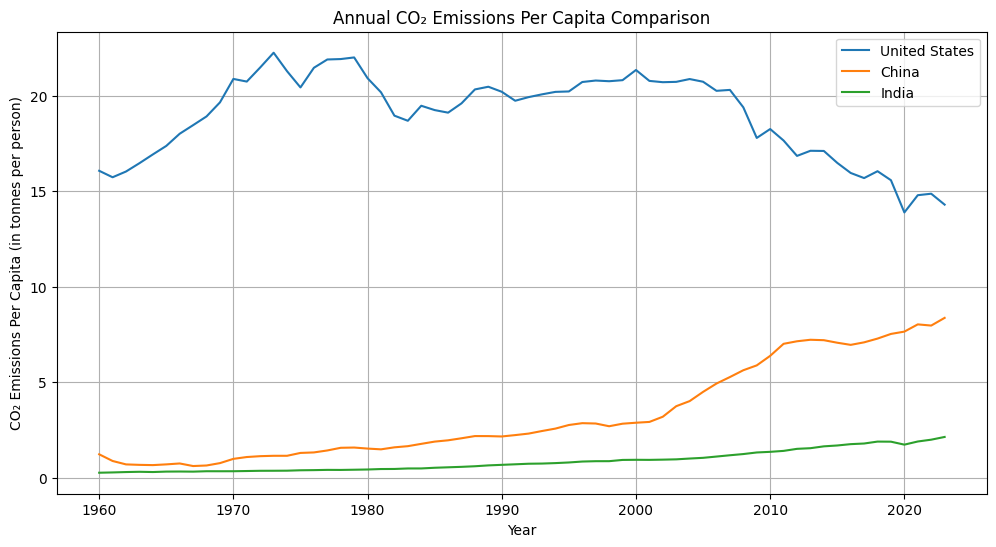

In [ ]:
# List of countries to compare
countries_to_compare = ['United States', 'China', 'India']
df_comparison = df[df['country'].isin(countries_to_compare)]

plt.figure(figsize=(12, 6))

# Loop through each country and plot its co2_per_capita
for country in countries_to_compare:
    country_data = df_comparison[df_comparison['country'] == country]
    plt.plot(country_data['year'], country_data['co2_per_capita'], label=country)

plt.title('Annual CO₂ Emissions Per Capita Comparison')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions Per Capita (in tonnes per person)')
plt.grid(True)
plt.legend() # Add a legend to identify the lines
plt.show()

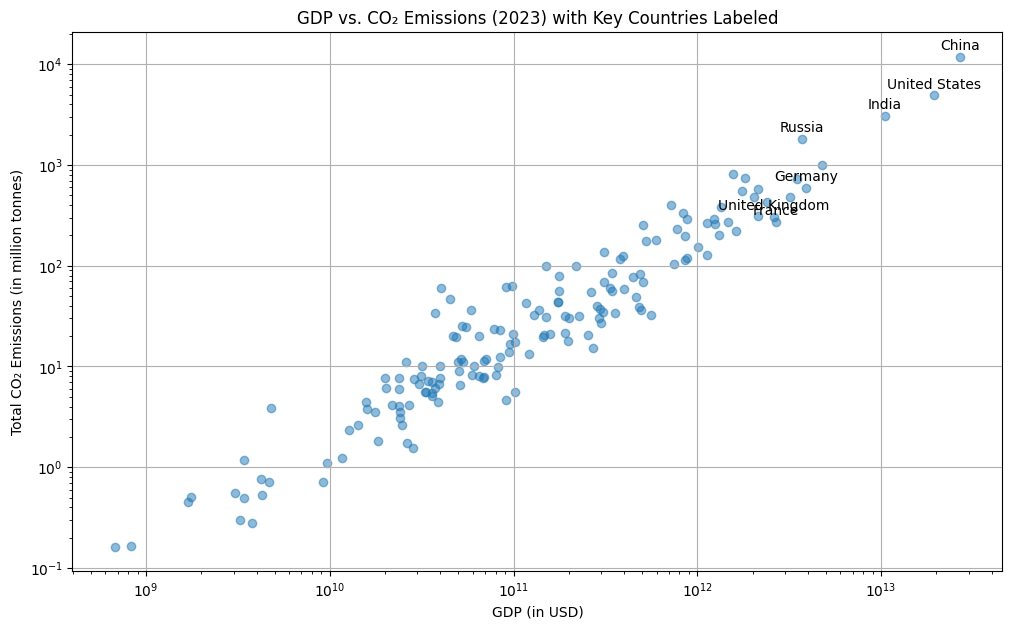

In [ ]:


df_latest = df[df['year'] == df['year'].max()]

plt.figure(figsize=(12, 7))
plt.scatter(df_latest['gdp'], df_latest['co2'], alpha=0.5)

countries_to_label = ['India', 'United States', 'China', 'United Kingdom', 'Germany', 'France','Russia']

for c in countries_to_label:
    country_data = df_latest[df_latest['country'] == c]
    if not country_data.empty:
        x_coord = country_data['gdp'].iloc[0]
        y_coord = country_data['co2'].iloc[0]
        
        # Add the text label to the plot
        plt.annotate(c,                     
                     (x_coord, y_coord),            
                     textcoords="offset points",      
                     xytext=(0, 5),                   
                     ha='center')                     


# --- Add titles and scales as before ---
plt.title(f'GDP vs. CO₂ Emissions ({latest_year}) with Key Countries Labeled')
plt.xlabel('GDP (in USD)')
plt.ylabel('Total CO₂ Emissions (in million tonnes)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()